In [67]:
from data import Datagenerator, TrainingStats
from model import LEO, load_model, save_model
from  torch.nn import MSELoss
from easydict import EasyDict as edict
from utils import load_config, check_experiment
from run import train_model
import torch.optim as optim
import argparse
import torch 
import torch.optim
import gc
from utils import display_data_shape, get_named_dict, one_hot_target,\
    softmax, sparse_crossentropy, calc_iou_per_class, log_data, load_config
import matplotlib.pyplot as plt
import numpy as np

In [68]:
config = load_config()

In [69]:
leo, meta_data, classes = train_model(config)

num tasks: 7
tr_data shape: torch.Size([7, 2, 384, 512, 14]),tr_data_masks shape: torch.Size([7, 2, 384, 512]), val_data shape: torch.Size([7, 5, 384, 512, 14]),val_masks shape: torch.Size([7, 5, 384, 512])
Class: bottle, Episode: 1, Val IOU: 0.1066544386650822
Class: bus, Episode: 1, Val IOU: 0.117603854139924
Class: cow, Episode: 1, Val IOU: 0.10023327288480259
Class: bicycle, Episode: 1, Val IOU: 0.0359211102189535
Class: chair, Episode: 1, Val IOU: 0.07027361193445422
Class: cat, Episode: 1, Val IOU: 0.17261761363397413
Class: boat, Episode: 1, Val IOU: 0.06750862972394636

mode:meta_train, episode:001, kl_loss:0.129911, total_val_loss:0.664285
Class: boat, Episode: 2, Val IOU: 0.10131973629482038
Class: car, Episode: 2, Val IOU: 0.09875114625813326
Class: bicycle, Episode: 2, Val IOU: 0.044598537274832525
Class: bus, Episode: 2, Val IOU: 0.16009231687539144
Class: chair, Episode: 2, Val IOU: 0.04442064527594468
Class: aeroplane, Episode: 2, Val IOU: 0.12593098035218858
Class: bott

KeyboardInterrupt: 

In [70]:
leo

LEO(
  (encoder): Sequential(
    (0): Conv2d(14, 28, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Flatten()
    (5): Linear(in_features=1376256, out_features=400, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=200, out_features=1376256, bias=True)
    (1): ReLU(inplace=True)
    (2): Reshape()
    (3): ConvTranspose2d(28, 28, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
)

In [71]:
classes

['bicycle', 'bottle', 'cow', 'chair', 'bird', 'boat', 'cat']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


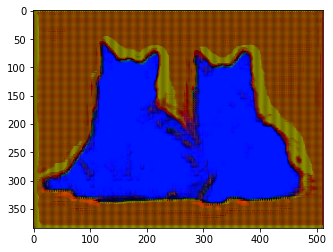

In [74]:
ind = 4
batch_data = get_named_dict(meta_data, 6)
input_data = batch_data.val_data[ind].permute(1, 2, 0)
plt.imshow(input_data.cpu().detach().numpy()[:,:,:3])

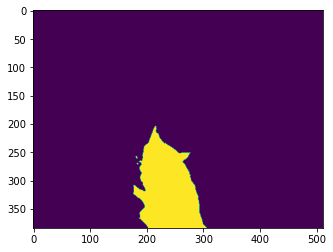

In [75]:
input_mask = batch_data.val_data_masks[ind]
plt.imshow(input_mask.cpu().detach().numpy())

In [65]:
latents, kl_loss = leo.forward_encoder(batch_data.val_data)
_, _, predictions = leo.forward_decoder(batch_data.val_data, latents, batch_data.val_data_masks)

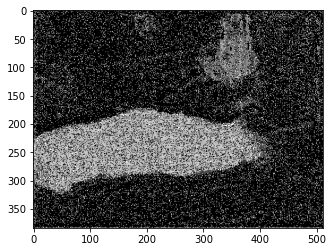

In [66]:
plt.imshow(np.argmax(predictions.cpu().detach().numpy()[ind], 0), cmap="gray")

In [43]:
predictions.shape

torch.Size([5, 2, 384, 512])